## Pymaceuticals Inc


## Analysis

The data was pretty much straight forward. There was not that much of a difference in the different drugs effectivness in the mice whether male or female. Also it seeemed like the drugs were less effective on the larger mice with the larger volume tumors. I am not sure if it's lack of effectivness is do to the fact that these are larger mice or if these are larger tumors. One thing that was consistent was the effect of using Capomulin. If you look at the data it shows you that between days 20-40 Capomulin was extremely effective in reducing the size of the tumors regardless of the size of the mice or tumors.

In [599]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Combined_data = pd.merge(study_results, mouse_metadata, how='left',on = ["Mouse ID"])


# Display the data table for preview
Combined_data.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [600]:
# Checking the number of mice.
mice=Combined_data["Mouse ID"].value_counts()
number_of_mice=len(mice)
number_of_mice

249

In [601]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = Combined_data.loc[Combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [602]:
# Optional: Get all the data for the duplicate mouse ID. 
Duplicate_df=Combined_data.loc[Combined_data["Mouse ID"]=="g989",:]
Duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [603]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = Combined_data[Combined_data['Mouse ID'].isin(duplicate_mice)==False]
clean_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [604]:
# Checking the number of mice in the clean DataFrame.
clean_mice=clean_df["Mouse ID"].value_counts()
clean_number_of_mice=len(clean_mice)
clean_number_of_mice

248

## Summary Statistics

In [605]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


regimen_df = clean_df.groupby("Drug Regimen")
tumor_mean = regimen_df["Tumor Volume (mm3)"].mean()
tumor_median = regimen_df["Tumor Volume (mm3)"].median()
tumor_var = regimen_df["Tumor Volume (mm3)"].var()
tumor_stdev = regimen_df["Tumor Volume (mm3)"].std()
tumor_SEM = regimen_df["Tumor Volume (mm3)"].sem()

#This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_df = pd.DataFrame([tumor_mean,tumor_median,tumor_var,tumor_stdev,tumor_SEM]).T
summary_df.columns = ["Tumor Volume Mean",
                      "Tumor Volume Median",
                      "Tumor Volume Variance",
                      "Tumor Volume Std. Dev.",
                      "Tumor Volume Std. Err."]
summary_df



,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [606]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

aggregations = {"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}

# Using the aggregation method, produce the same summary statistics in a single line.
clean_df.groupby("Drug Regimen").agg(aggregations)


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

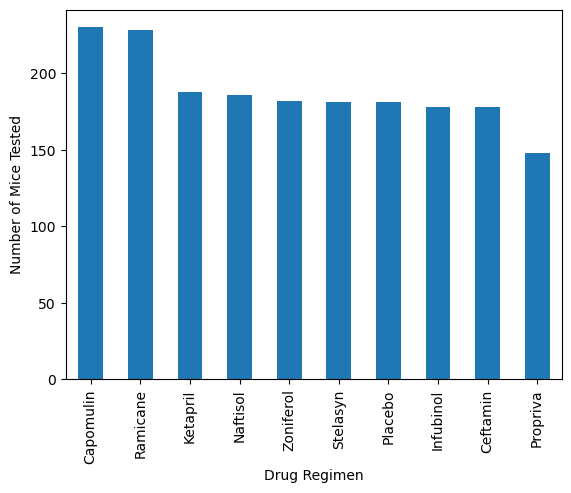

In [607]:
#Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

total_pandas_plot = clean_df["Drug Regimen"].value_counts().plot(kind="bar")
total_pandas_plot.set_xlabel("Drug Regimen")
total_pandas_plot.set_ylabel("Number of Mice Tested")

Text(0, 0.5, 'Number of Mice Tested')

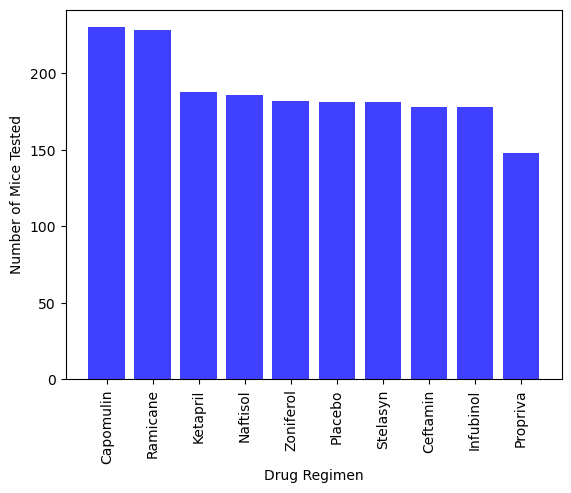

In [608]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.bar(x_axis, total_datapoints_df["Total Data Points"], color='b', alpha = 0.75, align="center")
plt.xticks(tick_locations, total_datapoints_df.index, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

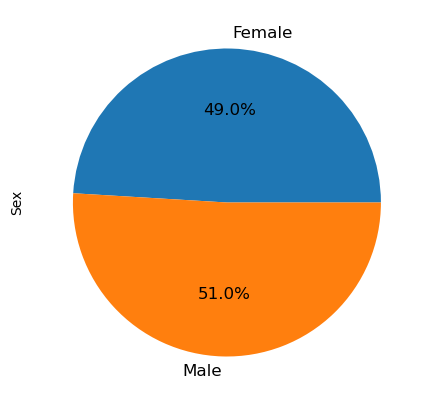

In [609]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_df = clean_df.groupby("Sex")
gender_count = gender_df["Sex"].count()
gender_plot = gender_count.plot(kind = "pie", y = "Sex", autopct="%1.1f%%", fontsize=12, figsize=(5, 5))


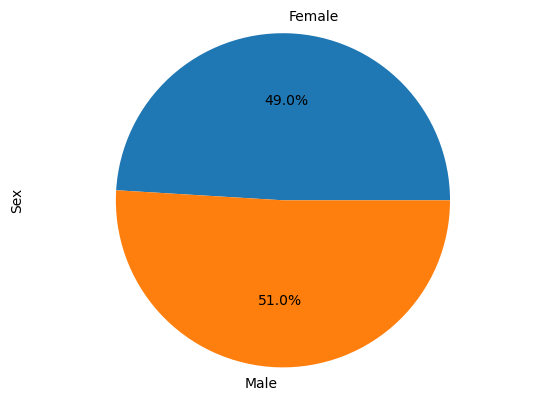

In [610]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
count = [gender_count["Female"],gender_count["Male"]]
plt.pie(count, labels = labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

### Quartiles, Outliers and Boxplots

In [611]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby("Mouse ID")
last_timepoint = last_timepoint["Timepoint"].max()
last_timepoint_df = pd.DataFrame(last_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_df = pd.merge(last_timepoint_df, clean_df, on = ["Mouse ID","Timepoint"])
tumor_volume_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [612]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol_cap = []
tumor_vol_ram = []
tumor_vol_inf = []
tumor_vol_cef = []

for i in range(len(tumor_volume_df)-1):
    if tumor_volume_df.loc[i, "Drug Regimen"] == "Capomulin":
        tumor_vol_cap.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])
    if tumor_volume_df.loc[i, "Drug Regimen"] == "Ramicane":
        tumor_vol_ram.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])
    if tumor_volume_df.loc[i, "Drug Regimen"] == "Infubinol":
        tumor_vol_inf.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])
    if tumor_volume_df.loc[i, "Drug Regimen"] == "Ceftamin":
        tumor_vol_cef.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])

# Put four tumor vol lists into a list for for loop
tumor_vol = [tumor_vol_cap, tumor_vol_ram, tumor_vol_inf, tumor_vol_cef]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
outlier_list = []
for i in range(len(tumor_vol)):
    quartiles = pd.Series(tumor_vol[i]).quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"\n{treatments[i]}:")
    print(f"The lower quartile of tumor volume is: {round(lowerq,2)}.")
    print(f"The upper quartile of tumor volume is: {round(upperq,2)}.")
    print(f"The interquartile range of tumor volume is: {round(iqr,2)}.")
    print(f"The median of tumor volume is: {round(quartiles,2)}.")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {round(lower_bound,2)} could be outliers.")
    print(f"Values above {round(upper_bound,2)} could be outliers.")
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    # Determine outliers using upper and lower bounds
    for j in range(len(tumor_vol[i])):
        if (tumor_vol[i][j] < lower_bound) or (tumor_vol[i][j] > upper_bound):
            outlier = tumor_vol[i][j]
            outlier_list.append(outlier)
            print(f"The outlier is  {outlier_list}.")



Capomulin:
The lower quartile of tumor volume is: 32.38.
The upper quartile of tumor volume is: 40.16.
The interquartile range of tumor volume is: 7.78.
The median of tumor volume is: 0.25    32.38
0.50    38.13
0.75    40.16
dtype: float64.
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.

Ramicane:
The lower quartile of tumor volume is: 31.56.
The upper quartile of tumor volume is: 40.66.
The interquartile range of tumor volume is: 9.1.
The median of tumor volume is: 0.25    31.56
0.50    36.56
0.75    40.66
dtype: float64.
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.

Infubinol:
The lower quartile of tumor volume is: 54.05.
The upper quartile of tumor volume is: 65.53.
The interquartile range of tumor volume is: 11.48.
The median of tumor volume is: 0.25    54.05
0.50    60.17
0.75    65.53
dtype: float64.
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.
The outlier is  [36.3213458].

Ceftamin:
The 

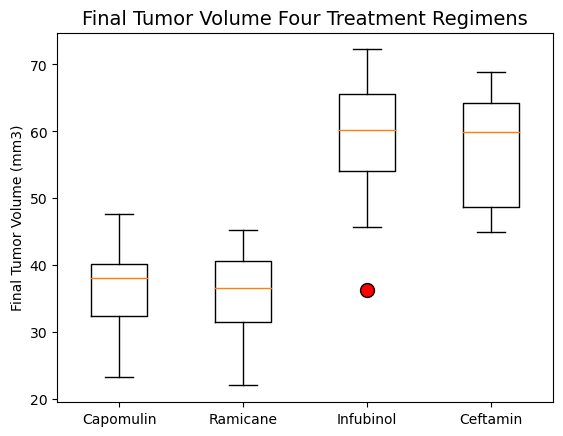

In [613]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_circle = dict(markerfacecolor = "r" , marker = "o", markersize = 10)
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_vol, flierprops = red_circle)
ax1.set_title("Final Tumor Volume Four Treatment Regimens", fontsize = 14)
ax1.set_xticklabels(treatments)
plt.show()



## Line and Scatter Plots

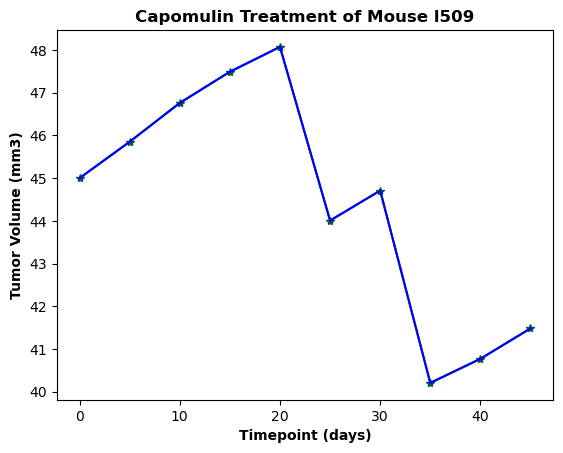

In [614]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Identify specific mouse ID and get data of the mouse id

mouse_df = Capomulin_df.loc[Capomulin_df['Mouse ID'] == "l509"]

# Generate a line plot
time_vol = plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], marker='*', color='#0B5345')
plt.plot(mouse_df["Timepoint"],mouse_df["Tumor Volume (mm3)"],  color = "blue")
                    
# Set x/y label, title
plt.title(f"Capomulin Treatment of Mouse l509", fontweight='bold')
plt.xlabel('Timepoint (days)', fontweight='bold')
plt.ylabel('Tumor Volume (mm3)', fontweight='bold')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

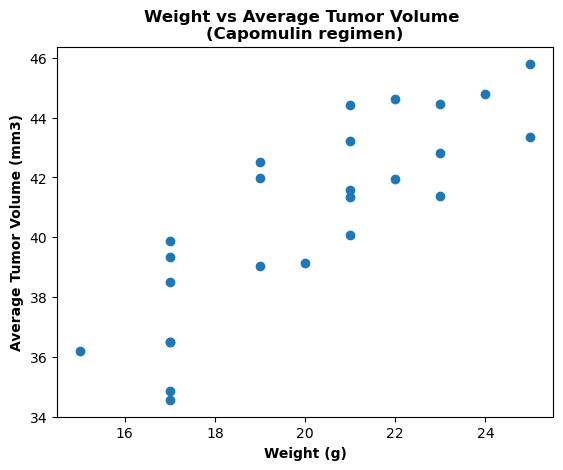

In [615]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Calculate mean of Weight (g) and Tumor Volume (mm3) based on Mouse ID


mice_weight_avg = Capomulin_df.groupby(['Mouse ID']).mean()['Weight (g)']
mice_tumor_avg = Capomulin_df.groupby(['Mouse ID']).mean()['Tumor Volume (mm3)']

# Generate a scatter plot
plt.scatter(mice_weight_avg, mice_tumor_avg)

# Set x/y label, title
plt.title('Weight vs Average Tumor Volume \n(Capomulin regimen)', fontweight='bold')
plt.xlabel('Weight (g)', fontweight='bold')
plt.ylabel('Average Tumor Volume (mm3)', fontweight='bold')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

## Correlation and Regression

The correlation between mouse weight and tumor vol is 0.84


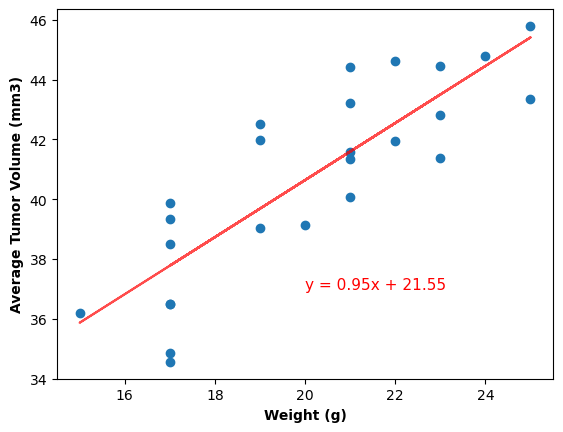

In [616]:
# Calculate the correlation coefficient and linear regression model 


# for mouse weight and average tumor volume for the Capomulin regimen

# Define x,y values
x_values = mice_weight_avg
y_values = mice_tumor_avg

# Calculate the correlation
correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation between mouse weight and tumor vol is {correlation}")

# Calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)


# y = mx + b
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color='r', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(line_eq,(20,37), fontsize=11, color="red")

# Define title and x/y labels
plt.xlabel('Weight (g)', fontweight='bold')
plt.ylabel('Average Tumor Volume (mm3)', fontweight='bold')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()